<a href="https://colab.research.google.com/github/shruti389/Fluxonium-designing/blob/main/fluxonium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install circuitq

#Installed Circuitq toolbox for simulating superconducting qubits

In [2]:
import circuitq as cq
import networkx as nx

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
graph = nx.MultiGraph()
graph.add_edge(0,1, element = 'C')
graph.add_edge(0,1, element = 'J')
graph.add_edge(0,1, element = 'L')

circuit = cq.CircuitQ(graph)


#Fluxonium consists of a linear inductance and a Josephson junction in parallel together with a shunted capacity. To visualize it you can use CircuitQ’s function visualize_circuit_general()

In [5]:
circuit.h

-E_{J010}*cos(\Phi_{1}/\Phi_{o}) + (\Phi_{1} + \tilde{\Phi}_{010})**2/(2*L_{010}) + 0.5*q_{1}**2/C_{01}

#Symbolic Hamiltonian
CircuitQ performs an automated quantization of the input circuit. It provides a symbolic SymPy expression for the corresponding circuit Hamiltonian.Besides the flux and charge variables q and phi,the Hamiltonian contains system parameters, whose values can be changed to tune the circuit.
Let’s assign a numerical value for the Josephson energy and the external flux.

In [6]:
circuit.h_parameters

[C_{01}, E_{J010}, L_{010}, \tilde{\Phi}_{010}]

In [7]:
EJ = circuit.c_v["E"]/3
phi_ext = np.pi*circuit.phi_0

In [8]:
h_num = circuit.get_numerical_hamiltonian(401,
                    parameter_values=[False, EJ, False, phi_ext ])

In [9]:
eigv, eigs = circuit.get_eigensystem()

#Diagonalization
To get the (lowest) eigenvalues and eigenstates of the numerical Hamiltonian, use get_eigensystem() which is a wrapper around SciPy’s eigsh function for sparse matrices.

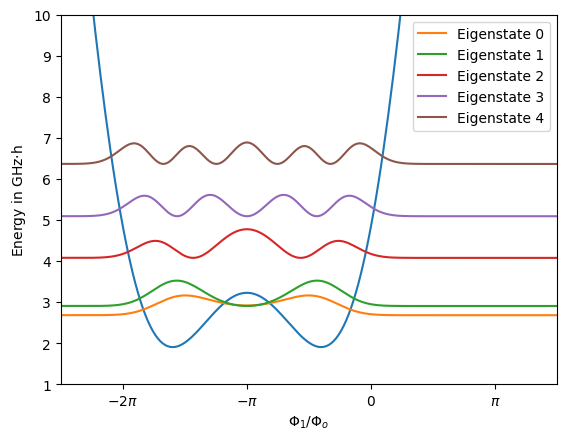

In [10]:
h = 6.62607015e-34
y_scaling = 1/(h *1e9)
plt.plot(circuit.flux_list, np.array(circuit.potential)*y_scaling, lw=1.5)
for n in range(5):
    plt.plot(circuit.flux_list,
             (eigv[n]+ abs(eigs[:,n])**2*2e-23)*y_scaling
             ,label="Eigenstate " +str(n))
plt.legend()
plt.xlabel(r"$\Phi_1 / \Phi_o$")
plt.ylabel(r"Energy in GHz$\cdot$h")
plt.xticks(np.linspace(-2*np.pi, 1*np.pi, 4)*circuit.phi_0 ,
           [r'$-2\pi$', r'$-\pi$',r'$0$',r'$\pi$'])
plt.xlim(-2.5*np.pi*circuit.phi_0, 1.5*np.pi*circuit.phi_0)
plt.ylim(1,10)
plt.show()